In [14]:
import sys, os
import numpy as np

In [2]:
sys.path.append("/home/anton/BigMac/skoltech/CRISPR_research/notebooks/")

In [3]:
import utils.plot_utils as pu
import utils.hierarcical_utils as hu
import utils.hamiltonian_utils as hamu

In [96]:
from importlib import reload
hu = reload(hu)
hamu = reload(hamu)
pu = reload(pu)

In [6]:
# pairs_path = "../../data/ES/ES3_R1_pairs.txt"
# lines_path = "../../data/ES/ES3_R1_spacers.txt"

# pairs_path = "../../data/ES_reload/ES/ES2_R1_pairs.txt"
# lines_path = "../../data/ES_reload/ES/ES2_R1_spacers.txt"

# pairs_path = "../data/ES/ES5_R1_pairs.txt"
# lines_path = "../data/ES/ES5_R1_spacers.txt"

# pairs_path = "../../data/SlO_10/SlO1_R1_pairs_10.txt"
# lines_path = "../../data/SlO_10/SlO1_R1_spacers_10.txt"

pairs_path = "../../data/clostr_06_07/good_1-10_R1_06_07pairsq10.txt"
#lines_path = "../../data/Sasha/Sasha1.fasta"

#pairs_path = "../data/Thermus/III/Vesuvius (1)_III_pairs.txt"
#lines_path = "../data/Thermus/III/Vesuvius (1).III.txt"

# with open(lines_path) as f:
#     lines = [x[:] for x in f.readlines()][1::] #CAREFULLLL

with open(pairs_path) as f:
    pairs = [[y[:] for y in x[:-2].split(' ') ] for x in f.readlines()]

lines = []
for p in pairs:
    lines.append(p[0])
    lines.append(p[1])
    
print(len(lines))

2516852


In [7]:
lines[:5]

['AAAGGTGACCATTGATTTCTTTCAGTTTCGGGAATA',
 'TGTTTTCCATAAACATTTCTAATTGACTTTTATTGT',
 'TGGTATATCATACTCGTGCATTGCCTGCTCCACATT',
 'ATACAACCATATATTTACCAATTATGTACTTATGAA',
 'CCAATTAAGTTACTAGATAAAAAAATAGAACAAATTA']

In [8]:
pairs[:2]

[['AAAGGTGACCATTGATTTCTTTCAGTTTCGGGAATA',
  'TGTTTTCCATAAACATTTCTAATTGACTTTTATTGT'],
 ['TGGTATATCATACTCGTGCATTGCCTGCTCCACATT',
  'ATACAACCATATATTTACCAATTATGTACTTATGAA']]

In [9]:
od = hu.get_ordered_spacers(lines)

In [10]:
answ, sp_to_n, cl_to_n, n_to_cl = hu.squash(od, 6)

A Jupyter Widget

In [19]:
counter = 0
true_keys = set()
for item in answ.items():
    if item[1] > 3:
        counter += 1
        true_keys.add(item[0])

In [20]:
cl_to_n = dict(zip(list(true_keys), np.arange(len(true_keys))))

In [21]:
len(cl_to_n)

227

In [22]:
pairs_cl = hu.process_pairs(pairs, cl_to_n, 6)

A Jupyter Widget

In [23]:
gr = hamu.pairs_to_gr(pairs_cl, len(cl_to_n))

In [24]:
np.save("./110", gr)

In [25]:
import pickle

In [26]:
pickle.dump(cl_to_n, open("./110_cl_to_n", 'wb'))
pickle.dump(answ, open("./110_nd", 'wb'))

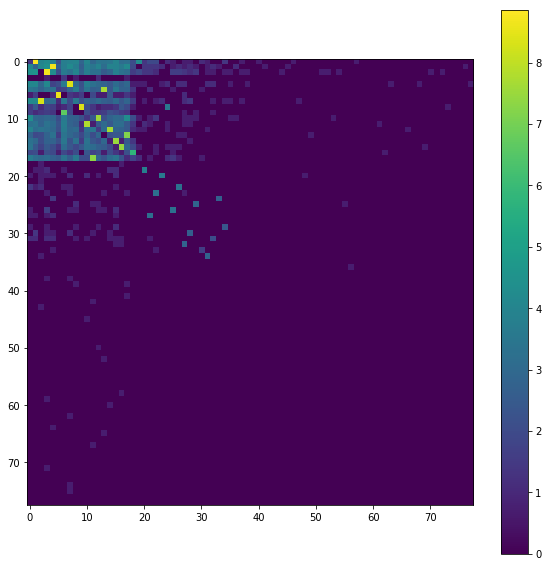

In [11]:
pu.plot_gr(gr, log =1)

In [27]:
arrays, weights = hamu.restore_arrays(gr)

In [29]:
mean_weights = [np.mean(x) for x in weights]

In [30]:
lens = [len(x) for x in arrays]

In [31]:
import matplotlib.pyplot as plt

<Container object of 18 artists>

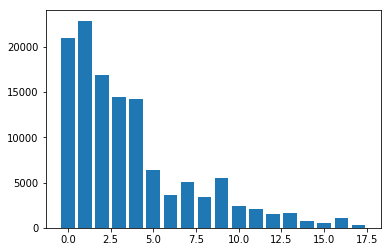

In [32]:
plt.bar(np.arange(18), mean_weights[:18])

In [64]:
mean_weights = [np.mean(x) for x in weights]

In [66]:
lens = [len(x) for x in arrays]

In [70]:
import matplotlib.pyplot as plt

<Container object of 18 artists>

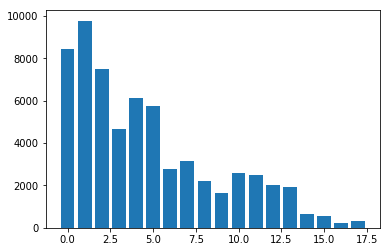

In [71]:
plt.bar(np.arange(18), mean_weights[:18])

In [59]:
with open("../../data/answers/Clostridium_1_3_q_10") as f:
    s1 = [x[:-2] for x in f.readlines()]

In [63]:
strain1 = [[y[1:] for y in x.split(',')[1:]] for x in s1]

In [72]:
with open("../../data/clostr_answer.txt") as f:
    s2 = [x[:-2] for x in f.readlines()]

In [75]:
strain2 = [[y for y in x.split("\t")[1:] if len(y) > 0] for x in s2]

In [106]:
arrays[1]

[72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8]

In [132]:
mask = []
for i in range(25):
    if a_close_to_any_b(arrays[i], cl_1):
        mask.append(1)
    elif a_close_to_any_b(arrays[i], cl_2):
        mask.append(2)
    else:
        mask.append(0)


In [133]:
mask

[0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1]

In [122]:
import editdistance as ed

In [123]:
ed.eval([72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8], [ 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8])

2

In [125]:
def a_close_to_b(a, b, t = 2):
    return ed.eval(a, b) <= 2

def a_close_to_any_b(a, b, t = 2):
    return any([a_close_to_b(a, x, t) for x in b])
        

In [140]:
for i in cl_2:
    print(a_close_to_any_b(i, arrays, 4))


False
True
True
True
True
True
False
False


In [103]:
 cl_1 + cl_2

[[72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8],
 [173, 90, 51, 4, 144, 94],
 [42, 175, 120, 20, 195, 1, 13, 36, 111, 179, 116, 226],
 [176, 102, 222],
 [188, 206, 62, 178, 169, 89, 197, 47],
 [63, 157, 221, 7, 165, 194, 177, 133, 0, 45, 199, 190, 5],
 [198, 98],
 [127, 59, 91, 201, 149, 168, 174, 185, 187, 52, 91, 1, 145, 38],
 [110, 4, 123, 208, 28, 49],
 [91, 133, 64],
 [200, 1, 77, 114, 137, 65],
 [6,
  213,
  106,
  220,
  124,
  74,
  126,
  112,
  28,
  21,
  22,
  131,
  166,
  29,
  121,
  59,
  88,
  43,
  16],
 [210, 53, 21, 50, 91, 118, 200, 171, 41, 122, 65, 145, 152, 172],
 [95, 216, 14, 67, 156, 85, 86, 71, 121, 30, 226],
 [151, 164, 223, 203],
 [15, 26, 142, 166, 219],
 [161, 54, 150, 168],
 [149, 25, 52, 87, 24, 104, 136, 207, 196, 167, 16, 10, 81, 73],
 [143, 76, 226, 11, 198, 148, 202, 84, 68],
 [16,
  3,
  93,
  60,
  97,
  35,
  75,
  130,
  209,
  2,
  134,
  114,
  162,
  23,
  17,
  137,
  44,
  180,
  66,
  140,
  123,
  117,
  124,
  80,
 

In [92]:
cl_1

[[72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8],
 [173, 90, 51, 4, 144, 94],
 [42, 175, 120, 20, 195, 1, 13, 36, 111, 179, 116, 226],
 [176, 102, 222],
 [188, 206, 62, 178, 169, 89, 197, 47],
 [63, 157, 221, 7, 165, 194, 177, 133, 0, 45, 199, 190, 5],
 [198, 98],
 [127, 59, 91, 201, 149, 168, 174, 185, 187, 52, 91, 1, 145, 38],
 [110, 4, 123, 208, 28, 49],
 [91, 133, 64],
 [200, 1, 77, 114, 137, 65],
 [6,
  213,
  106,
  220,
  124,
  74,
  126,
  112,
  28,
  21,
  22,
  131,
  166,
  29,
  121,
  59,
  88,
  43,
  16]]

In [81]:
cl_1 = [[cl_to_n[hu.find_closest(cl_to_n, x)[1]] for x in y] for y in strain1]

In [82]:
cl_2 = [[cl_to_n[hu.find_closest(cl_to_n, x)[1]] for x in y] for y in strain2]